In [244]:
import seaborn as sns 
import pandas as pd
from pandas import DataFrame, Series
import numpy as np 
from sklearn import preprocessing
import config.config as conf
import lib.util as U
import os
# Python debugger
import pdb
# Import statsmodel for time series analysis
import statsmodels.api as sm
%matplotlib inline
import matplotlib
sns.set(style="darkgrid")

In [75]:
pdb.set_trace
list_files = os.listdir(conf.settings["config"]["path"])
limit = 0
dframe = pd.read_csv(str(conf.settings["config"]["path"]+list_files[0]),sep=";",index_col=0, parse_dates=True, infer_datetime_format=True) #,nrows=limit)

In [29]:
dframe.describe()

,value
count,177096.000000
mean,92.230987
std,4.502678
min,33.100000
25%,90.500000
50%,91.800000
75%,96.300000
max,99.400000


In [30]:
X = dframe.value

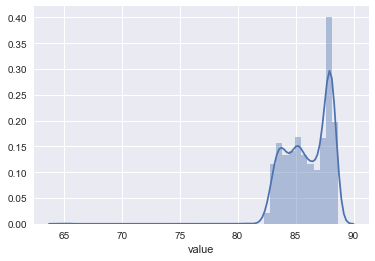

In [34]:
sns.distplot(X[2:2000], bins=None, hist=True, kde=True, rug=False, fit=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)


In [44]:
X_arr = np.asarray(X)
X
X.values.reshape(-1,1)

array([[ 86.5],
       [ 88.4],
       [ 85.7],
       ..., 
       [ 93.6],
       [ 93.8],
       [ 94. ]])

In [46]:
len(X.values)

177096

In [54]:
# two lines and 177096/2 columns
X_mat = X[0:177000].values.reshape(100,177000/100)

In [56]:
X_mat.shape

(100L, 1770L)

In [63]:
X_mat[1:5,1:7]

array([[ 83.4,  86.1,  84.2,  83.9,  83.5,  83.5],
       [ 85.1,  85.8,  87.3,  84.2,  87.9,  87.4],
       [ 88.1,  86.2,  88.1,  88.5,  87.7,  88.2],
       [ 91.8,  91.9,  91.8,  91.9,  92.3,  90.2]])

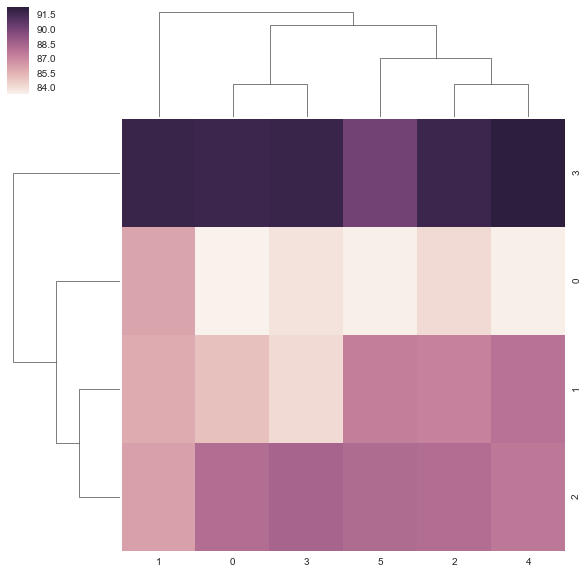

In [71]:
sns.clustermap(X_mat[1:5,1:7])

In [137]:
dframe.columns = [".".join(list_files[0].split(".")[0:-1])]

In [140]:
dframe.head()

,bono-cpu.idle_perc
Timestamp,
2016-09-14 00:00:04.454,86.5
2016-09-14 00:00:33.804,88.4
2016-09-14 00:01:03.815,85.7
2016-09-14 00:01:33.827,84.4
2016-09-14 00:02:03.810,85.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000190B9CF8>]], dtype=object)

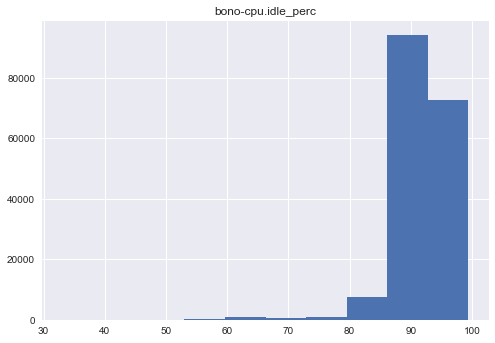

In [170]:
dframe.hist()

In [172]:
dframe.loc["2016-09-14 00:02:03.810"]

bono-cpu.idle_perc    85.3
Name: 2016-09-14 00:02:03.810000, dtype: float64

In [209]:
# create a function called times100
x_perc = None
def diff(x):
    global x_perc
    if not x_perc:
        x_perc = x
        return 0
    else:
        return (x-x_perc)
    
dframe["diff_1"] = dframe.applymap(diff)


,bono-cpu.idle_perc,diff_1,diff_2,diff_3,diff_4
Timestamp,,,,,
2016-09-14 00:00:04.454,86.5,0.0,0.0,0.0,0.0
2016-09-14 00:00:33.804,88.4,1.9,0.0,0.0,0.0
2016-09-14 00:01:03.815,85.7,-0.8,-2.7,0.0,0.0
2016-09-14 00:01:33.827,84.4,-2.1,-4.0,-1.3,0.0
2016-09-14 00:02:03.810,85.3,-1.2,-3.1,-0.4,0.9
2016-09-14 00:02:33.820,88.4,1.9,0.0,2.7,4.0
2016-09-14 00:03:03.843,87.7,1.2,-0.7,2.0,3.3
2016-09-14 00:03:33.813,85.6,-0.9,-2.8,-0.1,1.2
2016-09-14 00:04:03.836,85.2,-1.3,-3.2,-0.5,0.8


In [249]:
df_normalized

,0
0,0.805430
1,0.834087
2,0.793363
3,0.773756
4,0.787330
5,0.834087
6,0.823529
7,0.791855
8,0.785822
9,0.758673


## Preprocessing 

In [260]:




min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(dframe['diff_1'].values.reshape(-1,1))
df_normalized = pd.DataFrame(np_scaled)

dframe["diff_2"] = df_normalized.values


dframe.head()

,bono-cpu.idle_perc,diff_1,diff_2
Timestamp,,,
2016-09-14 00:00:04.454,86.5,0.0,0.805430
2016-09-14 00:00:33.804,88.4,1.9,0.834087
2016-09-14 00:01:03.815,85.7,-0.8,0.793363
2016-09-14 00:01:33.827,84.4,-2.1,0.773756
2016-09-14 00:02:03.810,85.3,-1.2,0.787330


In [254]:
dframe = dframe.drop('diff_3', axis=1)
dframe.head()

,bono-cpu.idle_perc,diff_1,diff_2
Timestamp,,,
2016-09-14 00:00:04.454,86.5,0.0,0.805430
2016-09-14 00:00:33.804,88.4,1.9,0.834087
2016-09-14 00:01:03.815,85.7,-0.8,0.793363
2016-09-14 00:01:33.827,84.4,-2.1,0.773756
2016-09-14 00:02:03.810,85.3,-1.2,0.787330


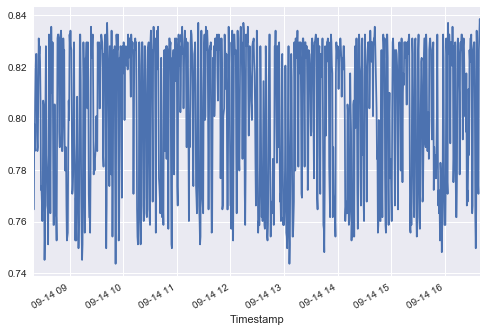

In [255]:

dframe[1000:2000]["diff_2"].plot()

In [174]:
dframe.describe()

,bono-cpu.idle_perc
count,177096.000000
mean,92.230987
std,4.502678
min,33.100000
25%,90.500000
50%,91.800000
75%,96.300000
max,99.400000


In [1]:
import config.settings as sett
import lib.util as U

sett.init()


initializig the logger. Log file is in log/main.log 


In [2]:
sett.logger.debug("This is a log text")

This is a log text
